In [2]:
# 3rd party
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Reading data from occlusion test
train=pd.read_csv('/nobackup/khauskne/kdd/occlusion_data/train_occlusion.csv')
val=pd.read_csv('/nobackup/khauskne/kdd/occlusion_data/val_occlusion.csv')
test=pd.read_csv('/nobackup/khauskne/kdd/occlusion_data/test_occlusion.csv')

In [4]:
# Loading Robovetter Minor Flags
robo_flags=pd.read_csv('/nobackup/khauskne/kdd/robovetter_flags_all_DR25.csv')

In [5]:
# Merging Robovetter Flags with test set occlusion results
test_csv=pd.merge(test, robo_flags, on=['target_id', 'tce_plnt_num'])

In [9]:
def post_process_flags(robo_flags, branch_explanations):
    branch_inds_to_keep=[1,2,3,4,6]
    
    robo_new=np.moveaxis(robo_flags ,0, -1)[branch_inds_to_keep]
    robo_new=np.moveaxis(robo_new, 0, -1)
    
    exp_new=np.moveaxis(branch_explanations, 0, -1)
    global_flux=exp_new[0]
    local_flux=exp_new[1]
    greater_flux=np.amax(test_csv[test_csv.columns[8:10]], axis=1)
    #combined_flux=np.where(added_flux>0, 1, 0)
    exp_new=exp_new[branch_inds_to_keep]
    exp_new[0]=greater_flux #combined_flux #greater_flux
    exp_new=np.moveaxis(exp_new, 0, -1)
    
    return robo_new, exp_new

In [10]:
occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
robo_array=np.array(test_csv[test_csv.columns[24:]])

In [11]:
robo, occlusion=post_process_flags(robo_array, occlusion_array)

In [8]:
np.sum(np.moveaxis(robo, 0, -1), axis=1)

array([2133,  263,   60,  257,  321])

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss

In [11]:
def top_n(robo, occlusion_array, n, average_type='weighted'):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[-1*n:]
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=precision_score(robo, occlusion, average=average_type, zero_division=0)
    weighted_rec=recall_score(robo,occlusion, average=average_type, zero_division=0)
    return weighted_prec, weighted_rec

In [10]:
top_n(robo_array, occlusion_array, 1, 'micro')

(0.4743715311785831, 0.478905735003296)

In [11]:
top_n(robo_array, occlusion_array, 1, 'macro')

(0.33301923080515294, 0.32596583059619844)

In [12]:
top_n(robo_array, occlusion_array, 1, 'weighted')

(0.7114473339456331, 0.478905735003296)

In [13]:
top_n(robo_array, occlusion_array, 2, 'micro')

(0.3596147567744042, 0.7261041529334212)

In [14]:
top_n(robo_array, occlusion_array, 2, 'macro')

(0.27824789730986144, 0.5290014614269845)

In [15]:
top_n(robo_array, occlusion_array, 2, 'weighted')

(0.6509340437015965, 0.7261041529334212)

In [16]:
top_n(robo_array, occlusion_array, 3, 'micro')

(0.280552834911307, 0.8497033618984838)

In [17]:
top_n(robo_array, occlusion_array, 3, 'macro')

(0.25377876683618367, 0.7037024978548733)

In [18]:
top_n(robo_array, occlusion_array, 3, 'weighted')

(0.617598680365637, 0.8497033618984838)

In [19]:
def top_n_hamming(robo, occlusion_array, n):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[-1*n:]
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=hamming_loss(robo, occlusion)
    #weighted_rec=recall_score(robo,occlusion, average=average_type)
    return weighted_prec#, weighted_rec

In [20]:
top_n_hamming(robo_array, occlusion_array, 1)

0.20835781913157037

In [21]:
top_n_hamming(robo_array, occlusion_array, 2)

0.31041462618348026

In [22]:
def top_n_acc(robo, occlusion_array, n):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[-1*n:]
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=accuracy_score(robo, occlusion)
    #weighted_rec=recall_score(robo,occlusion, average=average_type)
    return weighted_prec#, weighted_rec

In [23]:
top_n_acc(robo_array, occlusion_array, 1)

0.3676134508651649

In [24]:
top_n_acc(robo_array, occlusion_array, 2)

0.02513875285667646

In [25]:
top_n_acc(robo_array, occlusion_array, 3)

0.00652954619653934

In [ ]:
def top_n_jaccard(robo, occlusion_array, n, average_type='weighted'):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[-1*n:]
        #print(max_contrib)
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
        #print(occlusion[index])
    weighted_prec=jaccard_score(robo, occlusion, average=average_type)
    #weighted_rec=recall_score(robo,occlusion, average=average_type)
    return weighted_prec#, weighted_rec

In [27]:
top_n_jaccard(robo_array, occlusion_array, 1)

0.40128124468012205

In [28]:
top_n_jaccard(robo_array, occlusion_array, 2)

0.546551363967395

In [29]:
top_n_jaccard(robo_array, occlusion_array, 3)

0.5710807334334363

In [31]:
robo_array[0]

array([0, 1, 0, 0, 0, 0, 0])

In [ ]:
def eval_PCs(stat_func, num_pcs, trials):
    stats=summary_statistics(stat_func, num_pcs,trials)
    precision_list=[]
    recall_list=[]
    for i in range(trials):
        #print(i)
        train_exp=stats[0][i]['branch_explanations']
        val_exp=stats[1][i]['branch_explanations']
        test_exp=stats[2][i]['branch_explanations']
        train_robo=stats[0][i]['robo_flags']
        val_robo=stats[1][i]['robo_flags']
        test_robo=stats[2][i]['robo_flags']
        label=np.zeros(3063)
        label[np.where(stats[2][i]['original_label']=='PC')]=1
        
        
        scores=post_process_flags(test_robo, test_exp)
        sum_scores=np.sum(scores[1], axis=1)
        sum_scores[np.where(sum_scores>0)]=-1
        sum_scores[np.where(sum_scores==0)]=1
        sum_scores[np.where(sum_scores==-1)]=0
        true=label   
        pred=sum_scores
        prec=precision_score(true, pred)
        rec=recall_score(true, pred)
        precision_list.append(prec)
        recall_list.append(rec)
        
    return np.mean(precision_list), np.std(precision_list), np.mean(recall_list), np.std(recall_list)

In [16]:
robo, occlusion=post_process_flags(robo_array, occlusion_array)

In [17]:
occlusion

array([[ 9.0048260e-04,  1.3056538e-06,  1.6234151e-07,  4.7029807e-05,
        -9.1224024e-08],
       [-5.4644465e-02, -1.0547638e-03,  1.0043383e-04, -1.3821721e-03,
        -3.9309323e-02],
       [ 2.1441828e-03,  3.3428336e-03,  3.2398573e-05,  1.9448604e-04,
        -1.3093113e-04],
       ...,
       [ 3.0889548e-11,  6.3084440e-15,  9.3263410e-17,  2.6263270e-06,
         1.6702782e-14],
       [ 2.8292575e-09,  1.7700520e-13,  1.5365862e-14,  1.7115097e-10,
        -1.4027963e-14],
       [ 3.5105224e-10, -2.3921240e-14,  2.2018659e-12,  8.0819280e-07,
         7.7780105e-13]])

In [32]:
def per_class_prec_rec_top_n(robo, occlusion_array, n, branch_ind):
    robo, occlusion=post_process_flags(robo_array, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
        max_contrib=np.argsort(tce)[-1*n:]
        occlusion[index]=np.zeros([5])
        occlusion[index][max_contrib]=1
    robo_branch=np.moveaxis(robo, 0, -1)[branch_ind]
    occ_branch=np.moveaxis(occlusion, 0, -1)[branch_ind]
    weighted_prec=precision_score(robo_branch, occ_branch)
    weighted_rec=recall_score(robo_branch,occ_branch)
    return weighted_prec, weighted_rec

In [33]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 1, 0)

(0.9156908665105387, 0.549929676511955)

In [34]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 1, 1)

(0.3953488372093023, 0.19391634980988592)

In [35]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 1, 2)

(0.0025906735751295338, 0.016666666666666666)

In [36]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 1, 3)

(0.18109540636042404, 0.7976653696498055)

In [37]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 1, 4)

(0.17037037037037037, 0.07165109034267912)

In [40]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 2, 0)

(0.8570731707317073, 0.823722456633849)

In [41]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 2, 1)

(0.2392638036809816, 0.4448669201520912)

In [42]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 2, 2)

(0.01793103448275862, 0.21666666666666667)

In [43]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 2, 3)

(0.09551986475063398, 0.8793774319066148)

In [44]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 2, 4)

(0.1814516129032258, 0.2803738317757009)

In [45]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 3, 0)

(0.819949281487743, 0.9095171120487576)

In [46]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 3, 1)

(0.18640955004591367, 0.7718631178707225)

In [47]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 3, 2)

(0.011989100817438692, 0.36666666666666664)

In [48]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 3, 3)

(0.08324552160168598, 0.9221789883268483)

In [49]:
per_class_prec_rec_top_n(robo_array, occlusion_array, 3, 4)

(0.16730038022813687, 0.5482866043613707)

In [12]:
prec_vals=[]
rec_vals=[]
for n in range(1,6):
    prec, rec=top_n(robo_array, occlusion_array, n, 'micro')
    prec_vals.append(prec)
    rec_vals.append(rec)

Text(0.5, 1.0, 'Micro Precision and Recall for Top n labeled with Occlusion')

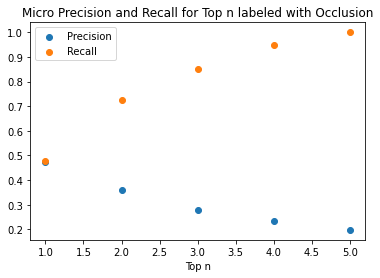

In [13]:
plt.scatter(np.arange(1,6), prec_vals, label='Precision')
plt.scatter(np.arange(1,6), rec_vals, label='Recall')
plt.legend()
plt.xlabel('Top n')
plt.title('Micro Precision and Recall for Top n labeled with Occlusion')

In [10]:
def threshold_occlusion(threshold, average_type='weighted'):
    occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
    robo=np.array(test_csv[test_csv.columns[24:]])
    robo, occlusion=post_process_flags(robo, occlusion_array)
    for index in range(len(occlusion)):
        tce=occlusion[index]
       # print(tce)
        occlusion[index]=np.where(occlusion[index]>threshold, 1, 0)
        
    #$print(occlusion)
    weighted_prec=precision_score(robo, occlusion, average=average_type, zero_division=0)
    weighted_rec=recall_score(robo,occlusion, average=average_type, zero_division=0)
    return weighted_prec, weighted_rec

In [20]:
def threshold_occlusion_PC(threshold, average_type='weighted'):
    occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
    robo=np.array(test_csv[test_csv.columns[24:]])
    robo, occlusion=post_process_flags(robo, occlusion_array)
    label=np.zeros(3063)
    label[np.where(test_csv['original_label']=='PC')]=1
    for index in range(len(occlusion)):
        tce=occlusion[index]
       # print(tce)
        occlusion[index]=np.where(occlusion[index]>threshold, 1, 0)
    sum_scores=np.sum(occlusion, axis=1)
    sum_scores[np.where(sum_scores>0)]=-1
    sum_scores[np.where(sum_scores==0)]=1
    sum_scores[np.where(sum_scores==-1)]=0
    true=label   
    pred=sum_scores
    prec=precision_score(true, pred, zero_division=0)
    rec=recall_score(true, pred, zero_division=0)
    return prec, rec

In [44]:
prec_vals=[]
rec_vals=[]
for i in np.logspace(-30, 0, 1000):
    prec, rec=threshold_occlusion_PC(i)
    prec_vals.append(prec)
    rec_vals.append(rec)

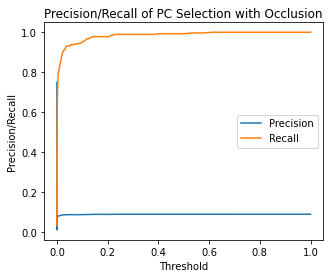

In [45]:
plt.figure(figsize(5,4))
plt.plot(np.logspace(-30, 0, 1000), prec_vals, label='Precision')
plt.plot(np.logspace(-30, 0, 1000), rec_vals, label='Recall')
plt.legend()
#plt.xscale('log')
#plt.xlim([0, 0.1])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision/Recall of PC Selection with Occlusion')
plt.savefig('PC_selection_occlusion_notlog.pdf')

In [11]:
prec_vals=[]
rec_vals=[]
for i in np.linspace(0, 1, 200):
    prec, rec=threshold_occlusion(i)
    prec_vals.append(prec)
    rec_vals.append(rec)

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold with Occlusion')

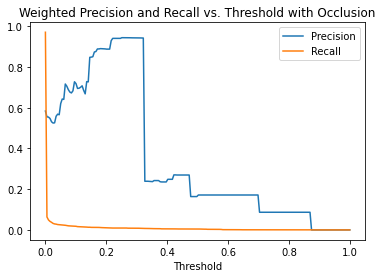

In [12]:
plt.plot(np.linspace(0, 1, 200), prec_vals, label='Precision')
plt.plot(np.linspace(0, 1, 200), rec_vals, label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold with Occlusion')

In [14]:
np.save('/nobackup/khauskne/kdd/prec_thresh_occl.npy',[np.linspace(0, 1, 200), prec_vals])
np.save('/nobackup/khauskne/kdd/rec_thresh_occl.npy',[np.linspace(0, 1, 200), rec_vals])

In [29]:
prec_vals=[]
rec_vals=[]
for i in np.logspace(-10, 0, 5000):
    prec, rec=threshold_occlusion(i)
    prec_vals.append(prec)
    rec_vals.append(rec)

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold with Occlusion')

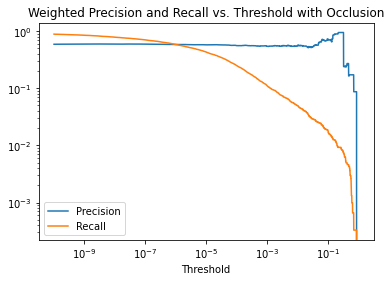

In [33]:
plt.loglog(np.logspace(-10, 0, 5000), prec_vals, label='Precision')
plt.loglog(np.logspace(-10, 0, 5000), rec_vals, label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold with Occlusion')

Text(0.5, 1.0, 'Weighted Precision and Recall vs. Threshold for Occlusion')

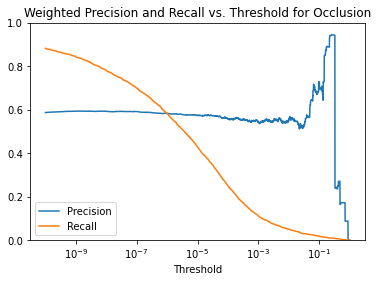

In [35]:
plt.plot(np.logspace(-10, 0, 5000), prec_vals, label='Precision')
plt.plot(np.logspace(-10, 0, 5000), rec_vals, label='Recall')
plt.xscale('log')
plt.ylim([0,1])
plt.legend()
plt.xlabel('Threshold')
plt.title('Weighted Precision and Recall vs. Threshold for Occlusion')

Issue of what if no branches are flagged by Robovetter? 
1) should we change/add a new metric to look only at cases where robovetter flags something
2) should we change the way we're doing this by introducing a threshold so that it can be completely analogous to the way we're doing our explainability?
3) should we add a new metric to analyze our explainability with where we only look at the maximally contributing branch in every case?

# Percentage of cases where there is at least one robovetter flag on that the maximally contributing branch (found via occlusion) agrees with one of the Robovetter flags

In [26]:
occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
robo_array=np.array(test_csv[test_csv.columns[24:]])
num=0
denom=0
for index in range(len(occlusion_array)):
    tce=occlusion_array[index]
    max_contrib=np.argmax(tce)
    #print(max_contrib)
    robo_flags_on=np.where(robo_array[index]==1)[0]
    if (np.shape(robo_flags_on)[0]>0):
        denom=denom+1
        if (max_contrib in robo_flags_on):
            num=num+1
        elif (1 in robo_flags_on):
            if (max_contrib==0):
                num=num+1
print(num/denom)

0.5834677419354839


# Percentage of cases where there is at least one robovetter flag on that the top two maximally contributing branch (found via occlusion) agrees with one of the Robovetter flags

In [36]:
occlusion_array=np.array(test_csv[test_csv.columns[8:15]])
robo_array=np.array(test_csv[test_csv.columns[24:]])
num=0
denom=0
for index in range(len(occlusion_array)):
    tce=occlusion_array[index]
    max_contrib=np.argsort(tce)[-2:]
    robo_flags_on=np.where(robo_array[index]==1)[0]
    
    if (np.shape(robo_flags_on)[0]>0):
        denom=denom+1
        common_flags=np.intersect1d(robo_flags_on, max_contrib)
        if (np.shape(common_flags)[0]>0):
            num=num+1
        elif (1 in robo_flags_on):
            #print(robo_flags_on)
            if (0 in max_contrib):
               # print(max_contrib)
                num=num+1
print(num/denom)

0.8330645161290322


## Comparison of Occlusion and Our Methodology

In [70]:
def apply_statistics(branches, files, num_PCs):
    new_csv=files[0].copy()
    new_csv.pop('Unnamed: 0')
    for branch in branches:
        all_scores=np.zeros(tuple((num_PCs, np.shape(files[0])[0])))
        for example in range(len(files)):
            all_scores[example]=files[example][branch]
        col_index=new_csv.columns.get_loc(branch)
        new_csv[branch]=np.mean(all_scores, axis=0)
        new_csv.insert(col_index+1, branch+' Std', np.std(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Max', np.max(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Min', np.min(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Med', np.median(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Mean+Std', np.mean(all_scores, axis=0)+np.std(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Mean-Std', np.mean(all_scores, axis=0)-np.std(all_scores, axis=0))
    return new_csv



def evaluate_mean(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]]<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'], 'minor_flags':csv['Minor_Descriptive_Flags'],'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict

def evaluate_min(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Min']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'],  'minor_flags':csv['Minor_Descriptive_Flags'], 'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict

def evaluate_max(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Max']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'],  'minor_flags':csv['Minor_Descriptive_Flags'], 'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict

def evaluate_med(csv, branches):
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    robo=np.array(csv[csv.columns[-7:]])
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Med']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    csv=pd.merge(csv, robo_flags, on=['target_id', 'tce_plnt_num'])
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'],  'minor_flags':csv['Minor_Descriptive_Flags'], 'branch_explanations': branch_explanation, 'robo_flags': robo}
    return mean_dict


In [85]:
def get_csv_with_stat(num_PCs, trial):
    run='/nobackup/khauskne/kdd/explainability_runs/exp_'+str(num_PCs)+'_PCs_trial_'+str(trial)+'/'
    all_train_groups=[]
    for index in range(num_PCs):
        train_group=pd.read_csv(run+'train_top_'+str(index)+'.csv')
        all_train_groups.append(train_group)
    

    all_val_groups=[]
    for index in range(num_PCs):
        val_group=pd.read_csv(run+'val_top_'+str(index)+'.csv')
        all_val_groups.append(val_group)

    all_test_groups=[]
    for index in range(num_PCs):
        test_group=pd.read_csv(run+'test_top_'+str(index)+'.csv')
        all_test_groups.append(test_group)

    branches=['Global Flux', 'Local Flux', 'Centroid', 'Odd Even', 'Secondary', 'Stellar', 'DV']
    train_statistics=apply_statistics(branches, all_train_groups, num_PCs)
    val_statistics=apply_statistics(branches, all_val_groups, num_PCs)
    test_statistics=apply_statistics(branches, all_test_groups, num_PCs)
    return train_statistics[['Global Flux Min', 'Local Flux Min', 'Centroid Min', 'Odd Even Min',
                                         'Secondary Min', 'Stellar Min', 'DV Min']], val_statistics[['Global Flux Min', 'Local Flux Min', 'Centroid Min', 'Odd Even Min',
                                         'Secondary Min', 'Stellar Min', 'DV Min']], test_statistics[['Global Flux Min', 'Local Flux Min', 'Centroid Min', 'Odd Even Min',
                                         'Secondary Min', 'Stellar Min', 'DV Min']]

In [159]:
num_PCs=np.shape(np.where(test_csv['original_label']=='PC')[0])[0]
total_test=np.shape(test_csv)[0]
threshold_vals=np.logspace(-9, 0, 1000)

In [160]:
num_flagged=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_csv[test_csv.columns[8:15]]>i)[0]))[0]
    num_flagged.append(threshold_flagged)
num_flagged=np.array(num_flagged)

In [161]:
test_new_exp=get_csv_with_stat(15, 2)[2]

In [162]:
num_flagged_new_exp=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_new_exp<-1*i)[0]))[0]
    num_flagged_new_exp.append(threshold_flagged)
num_flagged_new_exp=np.array(num_flagged_new_exp)

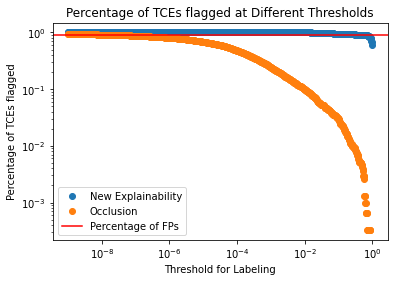

In [168]:
plt.title('Percentage of TCEs flagged at Different Thresholds')
plt.xlabel('Threshold for Labeling')
plt.ylabel('Percentage of TCEs flagged')



plt.loglog(threshold_vals, num_flagged_new_exp/total_test, 'o', label='New Explainability')
plt.loglog(threshold_vals, num_flagged/total_test, 'o', label='Occlusion')
plt.axhline(1-(num_PCs/total_test), color='r', label='Percentage of FPs')
plt.legend()
#plt.scatter(threshold_vals, num_flagged_new_exp/total_test)
#plt.scatter(threshold_vals, num_flagged/total_test)


In [169]:
num_PCs=np.shape(np.where(test_csv['original_label']=='PC')[0])[0]
total_test=np.shape(test_csv)[0]
threshold_vals=np.linspace(0, 1, 10000)

In [170]:
num_flagged=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_csv[test_csv.columns[8:15]]>i)[0]))[0]
    num_flagged.append(threshold_flagged)
num_flagged=np.array(num_flagged)

In [171]:
test_new_exp=get_csv_with_stat(10, 2)[2]

In [172]:
num_flagged_new_exp=[]
for i in threshold_vals:
    threshold_flagged=np.shape(np.unique(np.where(test_new_exp<-1*i)[0]))[0]
    num_flagged_new_exp.append(threshold_flagged)
num_flagged_new_exp=np.array(num_flagged_new_exp)

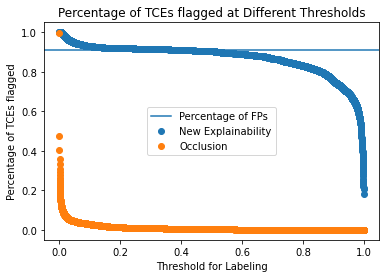

In [174]:
plt.title('Percentage of TCEs flagged at Different Thresholds')
plt.xlabel('Threshold for Labeling')
plt.ylabel('Percentage of TCEs flagged')

#plt.loglog(threshold_vals, num_flagged_new_exp/total_test, 'o')
#plt.loglog(threshold_vals, num_flagged/total_test, 'o')

plt.scatter(threshold_vals, num_flagged_new_exp/total_test, label='New Explainability')
plt.scatter(threshold_vals, num_flagged/total_test, label='Occlusion')
plt.axhline(1-(num_PCs/total_test), label='Percentage of FPs')
plt.legend()

## Comparison of the Number of PCs Used

In [177]:
num_PCs=np.shape(np.where(test_csv['original_label']=='PC')[0])[0]
total_test=np.shape(test_csv)[0]
threshold_vals=np.linspace(0, 1, 1000)

In [181]:
num_flagged_array=np.zeros([16, 1000])
for num_PCs in range(1, 15):
    test_new_exp=get_csv_with_stat(num_PCs, 2)[2]
    num_flagged=[]
    for i in threshold_vals:
        threshold_flagged=np.shape(np.unique(np.where(test_new_exp<-1*i)[0]))[0]
        num_flagged.append(threshold_flagged)
    num_flagged=np.array(num_flagged)
    num_flagged_array[num_PCs]=num_flagged

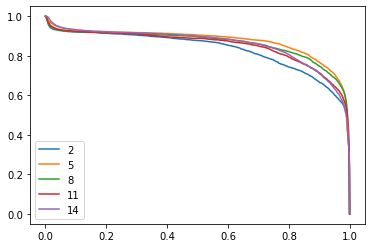

In [191]:
i=2
while i in range(1, 15):
    plt.plot(threshold_vals, num_flagged_array[i]/total_test, label=str(i))
    i=i+3
plt.legend()